Accuracy: 0.9035


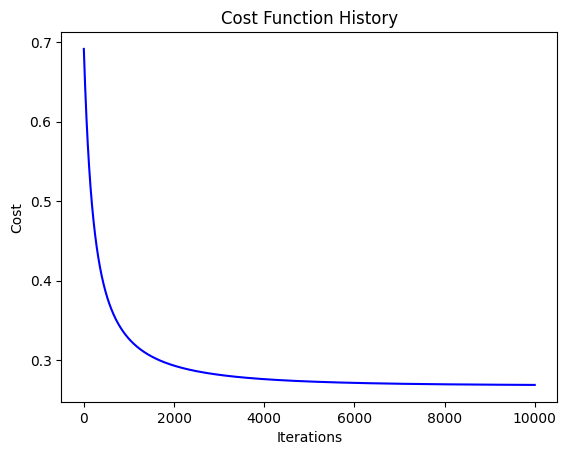

The tissue is Malignant (M).


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from Logistic_regresion import LogisticRegressionScratch

column_names = [
    'ID', 'diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1',
    'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
    'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2',
    'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3',
    'concave_points3', 'symmetry3', 'fractal_dimension3'
]
df = pd.read_csv('data/wdbc.csv', header=None, names=column_names)

X = df[['radius1', 'texture1']]  # Features: radius1 and texture1
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Target: 1 = malignant, 0 = benign

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegressionScratch(alpha=0.01, iterations=10000)

cost_history = log_reg.fit(X_train_scaled, y_train)

accuracy = log_reg.evaluate(X_test_scaled, y_test)
print(f"Accuracy: {accuracy:.4f}")

plt.plot(range(log_reg.iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

new_sample = pd.DataFrame([[18, 10]], columns=['radius1', 'texture1'])  # New sample: radius = 18, texture = 10
new_sample_scaled = scaler.transform(new_sample)  # Scale the features

new_pred = log_reg.predict(new_sample_scaled)

if new_pred == 1:
    print("The tissue is Malignant (M).")
else:
    print("The tissue is Benign (B).")